<a href="https://colab.research.google.com/github/akashcx/Deep-Learning-Projects/blob/main/Diabetes%20Prediction/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report,confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
print('Outcome 0 =',len(df[df['Outcome']==0]))
print('Outcome 1 =',len(df[df['Outcome']==1]))

Outcome 0 = 500
Outcome 1 = 268


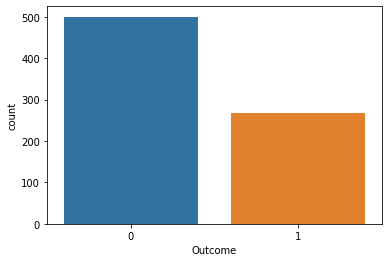

In [ ]:
sns.countplot(x='Outcome',data=df)

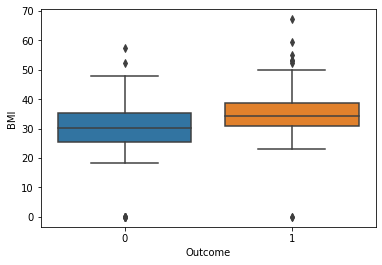

In [ ]:
sns.boxplot(x='Outcome',y='BMI',data=df)

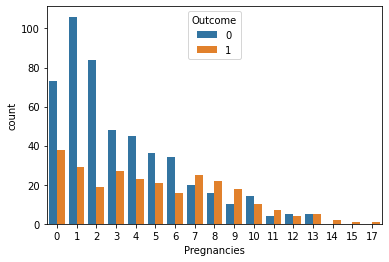

In [ ]:
sns.countplot(x='Pregnancies',data=df,hue='Outcome')

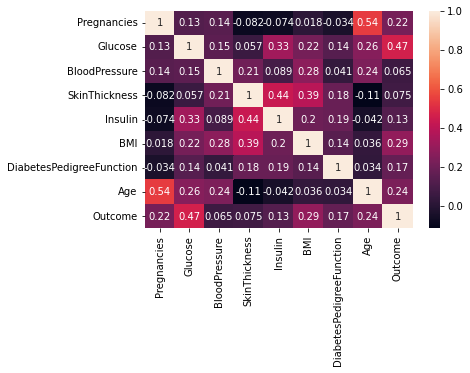

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
tempx = df.drop(['Pregnancies','Outcome'],axis=1)
print('Number of Rows with Missing Values')
for i in tempx:
  print(i,len(tempx[tempx[i]==0]))

Number of Rows with Missing Values
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0


In [ ]:
imp = SimpleImputer(missing_values=0, strategy='mean')
temp = pd.DataFrame(imp.fit_transform(df.drop(['Pregnancies','Outcome'],axis=1)))
temp2 = df.drop(['Pregnancies','Outcome'],axis=1)
temp3 = pd.DataFrame(df['Pregnancies'])
temp4 = pd.DataFrame(df['Outcome'])
temp.columns = temp2.columns
df = pd.concat([temp3,temp,temp4],axis=1)

In [ ]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()

model.add(Dense(8,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x=X_train, y=y_train, epochs=700, validation_data=(X_test, y_test))

Epoch 1/700
20/20 [==============================] - 2s 29ms/step - loss: 0.6812 - accuracy: 0.6450 - val_loss: 0.6640 - val_accuracy: 0.6688
Epoch 2/700
20/20 [==============================] - 0s 8ms/step - loss: 0.6630 - accuracy: 0.6466 - val_loss: 0.6488 - val_accuracy: 0.6688
Epoch 3/700
20/20 [==============================] - 0s 7ms/step - loss: 0.6503 - accuracy: 0.6466 - val_loss: 0.6335 - val_accuracy: 0.6688
Epoch 4/700
20/20 [==============================] - 0s 14ms/step - loss: 0.6362 - accuracy: 0.6466 - val_loss: 0.6190 - val_accuracy: 0.6688
Epoch 5/700
20/20 [==============================] - 0s 9ms/step - loss: 0.6198 - accuracy: 0.6498 - val_loss: 0.5966 - val_accuracy: 0.6818
Epoch 6/700
20/20 [==============================] - 0s 10ms/step - loss: 0.5982 - accuracy: 0.6743 - val_loss: 0.5737 - val_accuracy: 0.7013
Epoch 7/700
20/20 [==============================] - 0s 10ms/step - loss: 0.5722 - accuracy: 0.7150 - val_loss: 0.5486 - val_accuracy: 0.7338
Epoch 8/7

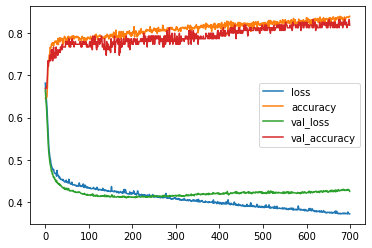

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
pred = (model.predict(X_test)>0.5).astype("int32")

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       103
           1       0.71      0.76      0.74        51

    accuracy                           0.82       154
   macro avg       0.79      0.80      0.80       154
weighted avg       0.82      0.82      0.82       154



In [ ]:
print(confusion_matrix(y_test,pred))

[[87 16]
 [12 39]]


In [ ]:
model.save('diabetes_prediction.h5')